In [1]:
# Data used in DataCamp exercises cannot be downloaded.
# Luckily, I found it here. Credits to: https://blog.csdn.net/u011292816/article/details/97046882

# Uncomment to get data 
# fn = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_2433/datasets/gapminder-clean.csv'
# from urllib.request import urlretrieve
# urlretrieve(fn, 'gapminder.csv')

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Consolidated [Gapminder](https://www.gapminder.org/data/) Data

In [3]:
data = pd.read_csv('gapminder.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2


In [4]:
data.describe(include='all')

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


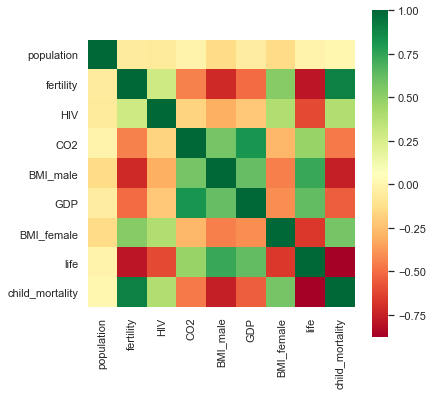

In [6]:
# Check correlation between variables
fig, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(data.corr(), square=True, cmap = 'RdYlGn', ax=ax)

plt.show()

# Linear Regression

## Single-feature Regression

In [7]:
# Input
X = data['fertility']
# Output
y = data['life']

In [8]:
# Reshape data into 2D arrays
X = X.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1, 1)

In [9]:
print(f'Input shape: {X.shape}')
print(f'Output shape: {y.shape}')

Input shape: (139, 1)
Output shape: (139, 1)


In [10]:
# Initiate the regressor
model = LinearRegression()

In [11]:
# Create the prediction space
pred_space = np.linspace(min(X), max(X)).reshape(-1, 1)

In [12]:
# Fit the model
model.fit(X, y)

LinearRegression()

In [13]:
# Compute predictions over prediction space
y_pred = model.predict(pred_space)

In [14]:
# R^2 value
print(model.score(X, y))

0.6192442167740035


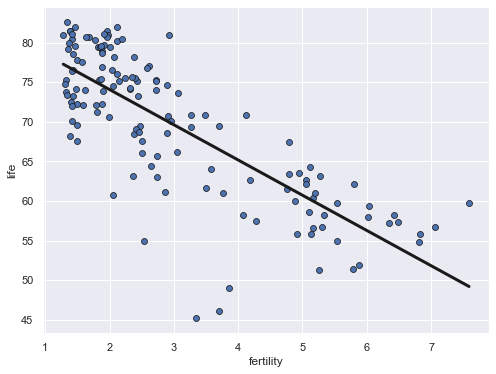

In [15]:
# Regression line
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data['fertility'],
                data['life'],
                edgecolor='k',
                ax=ax)
ax.plot(pred_space, y_pred,
        color='k',
        linewidth=3)


plt.show()

## Now, with train-test split

In [16]:
# This time, with a train-test split
# And using all the features

X = data.drop('life', axis=1) # Input
y = data['life'] # Output


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Initiate another regressor
model2 = LinearRegression()

In [18]:
# Fit the model
model2.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict on test data
y_pred = model2.predict(X_test)

In [20]:
# R^2 and RMSE
print(f'R^2: {model2.score(X_test, y_test)}')
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

R^2: 0.8380468731430133
RMSE: 3.2476010800369477


## Now, with k-Fold Cross Validation

In [22]:
model3 = LinearRegression()

In [23]:
cv_scores = cross_val_score(model3, X, y, cv=5)

In [24]:
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [25]:
print(f'Average 5-Fold CV Score: {np.mean(cv_scores)}')

Average 5-Fold CV Score: 0.859962772279345


In [30]:
# Compare different k-folds
%timeit cv3 = cross_val_score(model3, X, y, cv=3)
print(f'Acc: {np.mean(cv3)}')


%timeit cv10 = cross_val_score(model3, X, y, cv=10)
print(f'Acc: {np.mean(cv10)}')

19 ms ± 1.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Acc: 0.8718712782622262
60.9 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Acc: 0.8436128620131267


## Lasso Regression for Feature Selection

In [32]:
# Initiate regressor
model4 = Lasso(alpha=0.4, normalize=True)

In [34]:
# Fit to data
model4.fit(X, y)

Lasso(alpha=0.4, normalize=True)

In [35]:
coef = model4.coef_
print(coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


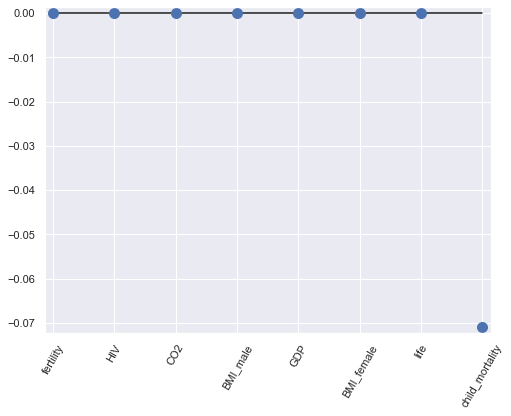

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(range(len(X.columns)), np.zeros(len(X.columns)), color='k')
ax.plot(range(len(X.columns)), coef, 'o', markersize=10)
ax.set_xticklabels(data.columns.values)

plt.xticks(rotation=60)
plt.margins(0.02)
plt.show()

## Ridge Regression

In [59]:
# Provided function for displaying R^2 values at diff alphas
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [54]:
# List of alphas and scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_std = []

In [55]:
# Initiate regressor
model5 = Ridge(normalize=True)

In [57]:
# Compute scores over range of alphas
for alpha in alpha_space:
    model5.alpha = alpha
    #10-fold CV
    ridge_cv = cross_val_score(model5, X, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv))
    ridge_std.append(np.std(ridge_cv))

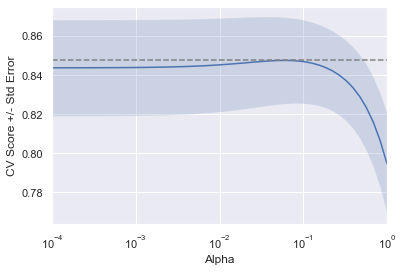

In [60]:
display_plot(ridge_scores, ridge_std)